In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-304b949c-8f22-ca1f-e436-ee0f0679ec15)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing and Cleansing Data

In [3]:
raw = pd.read_csv("/content/drive/MyDrive/DeepLearning/train.csv")
raw.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [5]:
df = raw.assign(capital = lambda x: 0)

df['capital'] = df['capital-gain'] - df['capital-loss']
df = df.drop(columns=["capital-gain","capital-loss","educational-num"])

df.tail()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income_>50K,capital
43952,52,Private,68982,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,1,0
43953,19,Private,116562,HS-grad,Never-married,Other-service,Own-child,White,Female,40,United-States,0,0
43954,30,Private,197947,Some-college,Divorced,Sales,Not-in-family,White,Male,58,United-States,0,0
43955,46,Private,97883,Bachelors,Never-married,Sales,Not-in-family,White,Female,35,United-States,0,0
43956,30,Private,375827,HS-grad,Never-married,Handlers-cleaners,Other-relative,White,Male,40,United-States,0,0


In [6]:
df = df.dropna()
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40727 entries, 0 to 40726
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           40727 non-null  int64 
 1   age             40727 non-null  int64 
 2   workclass       40727 non-null  object
 3   fnlwgt          40727 non-null  int64 
 4   education       40727 non-null  object
 5   marital-status  40727 non-null  object
 6   occupation      40727 non-null  object
 7   relationship    40727 non-null  object
 8   race            40727 non-null  object
 9   gender          40727 non-null  object
 10  hours-per-week  40727 non-null  int64 
 11  native-country  40727 non-null  object
 12  income_>50K     40727 non-null  int64 
 13  capital         40727 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 4.4+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa944566610>,
      dtype=object)

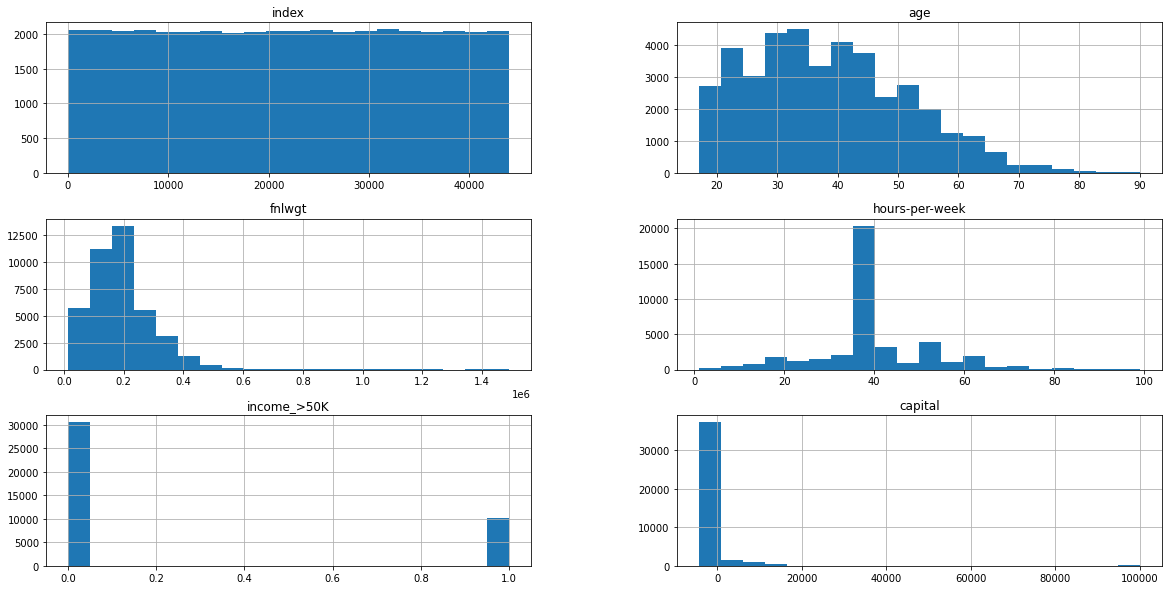

In [7]:
df.hist(bins=20,figsize=(20,10))

Dummy Variables

In [8]:
def dummy(df,obj):
  for x in obj:
    dumm = pd.get_dummies(df[x])
    df = pd.concat([df, dumm], axis='columns')
    df.drop([x], axis='columns', inplace=True)
  return df

In [9]:
df = dummy(df,['workclass','education','marital-status','occupation','relationship','race','gender','native-country'])
df.head()

,index,age,fnlwgt,hours-per-week,income_>50K,capital,Federal-gov,Local-gov,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,67,366425,60,1,99999,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,17,244602,15,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2,31,174201,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,58,110199,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,25,149248,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df = df.drop(columns=['index'])
df.head()

,age,fnlwgt,hours-per-week,income_>50K,capital,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,67,366425,60,1,99999,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,244602,15,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,31,174201,40,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,58,110199,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,25,149248,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Split Data for Modeling

In [11]:
df_x = df.drop(columns = ['income_>50K'])
df_y = df['income_>50K']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [13]:
scaler = StandardScaler().fit(df_x)
x = scaler.transform(df_x)
y = np.array(df_y)

In [14]:
print(df_x.count())
print(df_y.count())

age                40727
fnlwgt             40727
hours-per-week     40727
capital            40727
Federal-gov        40727
                   ...  
Thailand           40727
Trinadad&Tobago    40727
United-States      40727
Vietnam            40727
Yugoslavia         40727
Length: 102, dtype: int64
40727


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32581, 102)
(32581,)
(8146, 102)
(8146,)


Decision Tree

In [16]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=25)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
score = classifier.score(x_test, y_test)
recall_precision_f1 = precision_recall_fscore_support(y_test, y_pred, average = "macro")

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("accuracy = ", accuracy)
print("precision = ",precision)
print("recall = ", recall)
print("f1 = ", f1)

accuracy =  0.8270316719862509
precision =  0.6521084337349398
recall =  0.6446650124069478
f1 =  0.6483653606189168


SVM

In [17]:
svm = SVC(gamma=0.001)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
score = svm.score(x_test, y_test)
recall_precision_f1 = precision_recall_fscore_support(y_test,y_pred, average = "macro")

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("accuracy = ", accuracy)
print("precision = ",precision)
print("recall = ", recall)
print("f1 = ", f1)

accuracy =  0.8412717898355021
precision =  0.7452445652173914
recall =  0.5444168734491315
f1 =  0.6291941496988815
